# Collegamento Drive

In [24]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


# Import

In [25]:
%pip install --quiet --upgrade diffusers transformers accelerate mediapy peft

In [ ]:
!pip install torchlibrosa

In [ ]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import librosa
import torch
import datetime
import time

from PIL import Image
import shutil
import threading
from multiprocessing import Process, Manager

#collegamento con processing

import socket
import cv2
import base64
import time

from IPython.display import display, Javascript, Audio
from google.colab import output

import io
import base64

from diffusers import LCMScheduler, AutoPipelineForText2Image
import mediapy as media
import random

In [ ]:
# PATHS

# Percorso modello riconoscimento suoni
path = "/content/drive/MyDrive/SonART/Code" # di Diego


# Percorso dei pesi del modello su Drive
checkpoint_path = "/content/drive/MyDrive/SonART/saved_model/panns/Cnn14_mAP=0.431.pth" # di Diego


# Percorso all'architettura del modello
checkpoint_model = "/content/drive/MyDrive/SonART/saved_model/panns/panns_model.pth" # di Diego



# CHECK ALL THE PATHS EXISTS
if os.path.exists(path):
    print("La cartella 'panns_inference' esiste!")
else:
    print("Errore: La cartella 'panns_inference' non è stata trovata. Controlla il percorso.")

if os.path.exists(checkpoint_path):
    print("La cartella CHECKPOINT esiste!")
else:
    print("Errore: La cartella CHECKPOINT non è stata trovata. Controlla il percorso.")

if os.path.exists(checkpoint_model):
    print("La cartella CHECKPOINT_MODEL esiste!")
else:
    print("Errore: La cartella CHECKPOINT_MODEL non è stata trovata. Controlla il percorso.")


print("\n\n")
# TEST DIEGO
'''
# Percorso al test
path_test_05sec = "/content/drive/MyDrive/sonart/test_half_sec.mp3"
path_test_1sec = "/content/drive/MyDrive/sonart/test_full_1_sec.mp3"

if os.path.exists(path_test_05sec):
    print("Il file TEST_05SEC esiste!")
else:
    print("Errore: Il file TEST_05SEC non è stato trovato. Controlla il percorso.")

if os.path.exists(path_test_1sec):
    print("Il file TEST_1SEC esiste!")
else:
    print("Errore: Il file TEST_1SEC non è stato trovato. Controlla il percorso.")

'''

La cartella 'panns_inference' esiste!
Errore: La cartella CHECKPOINT non è stata trovata. Controlla il percorso.
Errore: La cartella CHECKPOINT_MODEL non è stata trovata. Controlla il percorso.





'\n# Percorso al test\npath_test_05sec = "/content/drive/MyDrive/sonart/test_half_sec.mp3"\npath_test_1sec = "/content/drive/MyDrive/sonart/test_full_1_sec.mp3"\n\nif os.path.exists(path_test_05sec):\n    print("Il file TEST_05SEC esiste!")\nelse:\n    print("Errore: Il file TEST_05SEC non è stato trovato. Controlla il percorso.")\n\nif os.path.exists(path_test_1sec):\n    print("Il file TEST_1SEC esiste!")\nelse:\n    print("Errore: Il file TEST_1SEC non è stato trovato. Controlla il percorso.")\n\n'

In [ ]:
sys.path.append(path)

In [ ]:
from panns_inference import AudioTagging, SoundEventDetection, labels

device = "cuda" if torch.cuda.is_available() else "cpu"

# Recupero modello audio dal Drive

In [26]:
# Carica il modello salvato
model = torch.load(checkpoint_model, map_location=device, weights_only=False)

# Scelta audio e divisione in segmenti

In [ ]:
class ObservableList(list):
    def append(self, item, i, last_event):
        super().append(item)  # Chiamata originale
        self.on_append(item, i, last_event)
    def on_append(self, item, i, last_event):
        prompt = item + ' 8k'
        image = pipe(prompt=prompt, num_inference_steps=5, guidance_scale=0).images[0]


In [ ]:
def best_tag(clipwise_output):
    """Visualization of audio tagging result.

    Args:
      clipwise_output: (classes_num,)
    """
    sorted_indexes = np.argsort(clipwise_output)[::-1]

    return sorted_indexes[0]

# Utilizzo modello audio + immagini

**Se non avete già un modello nel percorso allora passate model=None**

In [ ]:
'''
NON CARICA CORRETTAMENTE QUI, NON SO PERCHE'
'''
if os.path.exists(checkpoint_model) and os.path.exists(checkpoint_path):
    at = AudioTagging(model = model, checkpoint_path=checkpoint_path, checkpoint_model=checkpoint_model, device=device)
else:
    at = AudioTagging(model = None, checkpoint_path=checkpoint_path, checkpoint_model=checkpoint_model, device=device)


Checkpoint path: /content/drive/MyDrive/SonART/saved_model/panns/Cnn14_mAP=0.431.pth
✅ La cartella esiste già: /content/drive/MyDrive/SonART/saved_model/panns
⚠️ File non trovato o corrotto. Scarico il modello...
✅ File scaricato correttamente (312.26 MB)
💾 Modello istanziato salvato su Drive: /content/drive/MyDrive/sonart/weigth
GPU number: 1


In [ ]:
output.enable_custom_widget_manager()

In [ ]:
!apt-get install libportaudio2
%pip install sounddevice

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 65.3 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Fetched 65.3 kB in 1s (108 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1.1) ...
Setting up libportaudio2:amd64 (19.6.0-1.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.8) ...
/sbin/ldconfig.real: /usr/local/lib/libhwloc.so.15 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libumf.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapte

# Test

In [ ]:
model_id = "stabilityai/stable-diffusion-xl-base-1.0"
adapter_id = "latent-consistency/lcm-lora-sdxl"

pipe = AutoPipelineForText2Image.from_pretrained(model_id, torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)
# pipe.to("cpu")
pipe.to(device)

# load and fuse lcm lora
pipe.load_lora_weights(adapter_id)
pipe.fuse_lora()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


pytorch_lora_weights.safetensors:   0%|          | 0.00/394M [00:00<?, ?B/s]

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder_2'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


In [62]:
# STREAM CONTINUO

'''
Non potendo registrare direttamente in Colab, registriamo dal browser (ecco perchè si deve usare js)
e poi passiamo i dati a Colab (che usa python nel kernel remoto)

REGISTRAZIONE DA MIC E MANDA LE REC A COLAB (python), STOP REC, INTERFACCIA UTENTE
L'audio registra in formato PCM. Lo convertiamo in WAV per avere un formato più utilizzabile.
Per passare i dati a python poi dobbiamo trasformare il WAV in Base64 (questo è un passaggio obbligato, se no non possiamo inviare dati con Colab)
'''

# Callback che viene eseguito ogni volta che arriva un blob (ogni 1 sec)
def handle_audio_chunk(data):

    # Decodifica audio
    b64 = data.split(',',1)[1]
    audio_bytes = base64.b64decode(b64) # da base64 a WAV
    audio_chunks.append(audio_bytes)
    print(f"🔊 Ricevuto blob #{len(audio_chunks)} da WebAudio")
    print(type(audio_chunks[-1])) # <class 'bytes'> significa che il file è .wav

    # Inferenza
    process_audio(audio_bytes, len(audio_chunks))


# JS ring‑buffer
def record_streaming_audio_js_ring():
    display(Javascript("""
    (function() {

      // PARAMETRI
      let audioCtx, source, processor, stream, interval;
      const sampleRate = 44100;
      const windowSec = 1;
      const sendIntervalMs = 1000;
      let ring = [];


      // CONVERSIONE DA PCM A WAV
      function encodeWAV(samples) {
        const buffer = new ArrayBuffer(44 + samples.length * 2);
        const view = new DataView(buffer);
        function writeString(s, o) {
          for (let i = 0; i < s.length; i++) view.setUint8(o + i, s.charCodeAt(i));
        }
        writeString('RIFF', 0); view.setUint32(4, 36 + samples.length * 2, true);
        writeString('WAVE', 8); writeString('fmt ', 12);
        view.setUint32(16, 16, true); view.setUint16(20, 1, true);
        view.setUint16(22, 1, true); view.setUint32(24, sampleRate, true);
        view.setUint32(28, sampleRate * 2, true); view.setUint16(32, 2, true);
        view.setUint16(34, 16, true); writeString('data', 36);
        view.setUint32(40, samples.length * 2, true);
        let offset = 44;
        for (let i = 0; i < samples.length; i++) {
          const s = Math.max(-1, Math.min(1, samples[i]));
          view.setInt16(offset, s < 0 ? s * 0x8000 : s * 0x7FFF, true);
          offset += 2;
        }
        return new Blob([view], { type: 'audio/wav' });
      }


      // FUNZIONI PER REGISTRAZIONE
      async function startRecording() {
        stream = await navigator.mediaDevices.getUserMedia({ audio: true });
        audioCtx = new AudioContext({ sampleRate });
        source = audioCtx.createMediaStreamSource(stream);
        processor = audioCtx.createScriptProcessor(4096, 1, 1);
        source.connect(processor);
        processor.connect(audioCtx.destination);

        processor.onaudioprocess = e => {
          const input = e.inputBuffer.getChannelData(0);
          ring.push(new Float32Array(input));
          let total = ring.reduce((s, a) => s + a.length, 0);
          while (total > windowSec * sampleRate) {
            total -= ring.shift().length;
          }
        };

        interval = setInterval(async () => {
          const totalSamples = sampleRate * windowSec;
          const out = new Float32Array(totalSamples);
          let offs = totalSamples;
          for (let i = ring.length - 1; i >= 0; i--) {
            const buf = ring[i];
            const copyLen = Math.min(buf.length, offs);
            offs -= copyLen;
            out.set(buf.subarray(buf.length - copyLen), offs);
            if (offs === 0) break;
          }

          // CONVERSIONE DA WAV A BASE64
          const wav = encodeWAV(out);
          const b64 = await new Promise(res => {
            const r = new FileReader();
            r.onloadend = () => res(r.result);
            r.readAsDataURL(wav);
          });
          google.colab.kernel.invokeFunction('notebook.chunkAudio', [b64], {});
        }, sendIntervalMs);

        console.log("🎙️ WebAudio realtime avviato");
      }

      function stopRecording() {
        processor.disconnect();
        source.disconnect();
        audioCtx.close();
        clearInterval(interval);
        stream.getTracks().forEach(t => t.stop());
        console.log("⏹️ WebAudio fermato");
      }

      // PULSANTI
      let c = document.getElementById('recorder-container');
      if(!c){
        c=document.createElement('div');
        c.id='recorder-container';
        c.style.position = 'fixed';       // Rende il contenitore fisso
          c.style.top = '10px';             // Distanza dal bordo superiore
          c.style.left = '10px';            // Distanza dal bordo sinistro
          c.style.zIndex = '1000';          // Assicura che sia in primo piano
          c.style.background = '#fff';      // Sfondo bianco per visibilità
          c.style.padding = '10px';         // Padding interno
          c.style.border = '1px solid #ccc';
          c.style.borderRadius = '8px';
        document.body.appendChild(c);
      }
      c.innerHTML = `
        <button onclick="startRecording()">🎙️ Start WebAudio</button>
        <button onclick="stopRecording()">⏹️ Stop WebAudio</button>
      `;
      window.startRecording = startRecording;
      window.stopRecording = stopRecording;
    })();
    """))

# Python callback
audio_chunks = []
output.register_callback('notebook.chunkAudio', handle_audio_chunk)

In [72]:
# DA STREAM AUDIO A PREDIZIONE CLASSE

# Funzione personalizzata da eseguire ogni secondo
last_printed_word = None
previous_word = None
Style = ""
Background = ""

def process_audio(audio_bytes, index):
    global last_printed_word, previous_word  # <-- questa è la parte importante
    print("mi sono attivato")
    wav_path = f"audio_chunk_{index}.wav"
    with open(wav_path, "wb") as f:
      f.write(audio_bytes)

    try:
        # Carica l'audio
        y, sr = librosa.load(wav_path, sr=None, mono=True)
        segment = y[None, :]  # aggiunge batch dim: (1, samples)

        # Inferenza
        clipwise_output, embedding = at.inference(segment)
        clipwise_output = clipwise_output[0]

        # Trova la classe con confidenza più alta
        index = best_tag(clipwise_output)
        predicted_class = np.array(labels)[index]
        confidence = clipwise_output[index]

        if confidence >= 0.4:
            print(f"🎧 Predizione: {predicted_class} ({confidence:.3f})")
            if predicted_class == previous_word:
                if predicted_class != last_printed_word:
                    last_printed_word = predicted_class
                    prompt = Style + predicted_class + ' with'+ Background + 'in the background'
                    print(prompt)
                    image = pipe(prompt=prompt, num_inference_steps=5, guidance_scale=0).images[0]
                    display(image)
                else:
                    print("non genero")
            else:
                previous_word = predicted_class
                print(f"previous word: {previous_word}")
        else:
            print("🤔 Nessuna classe rilevante con confidenza sufficiente.")

    except Exception as e:
        print(f"❌ Errore nell'elaborazione audio: {e}")


<IPython.core.display.Javascript object>




🔊 Ricevuto blob #1 da WebAudio
<class 'bytes'>
mi sono attivato
🤔 Nessuna classe rilevante con confidenza sufficiente.
🔊 Ricevuto blob #2 da WebAudio
<class 'bytes'>
mi sono attivato
🤔 Nessuna classe rilevante con confidenza sufficiente.
🔊 Ricevuto blob #3 da WebAudio
<class 'bytes'>
mi sono attivato
🎧 Predizione: Speech (0.876)
previous word: Speech
🔊 Ricevuto blob #4 da WebAudio
<class 'bytes'>
mi sono attivato
🎧 Predizione: Speech (0.704)
Speechwithin the background


  0%|          | 0/5 [00:00<?, ?it/s]

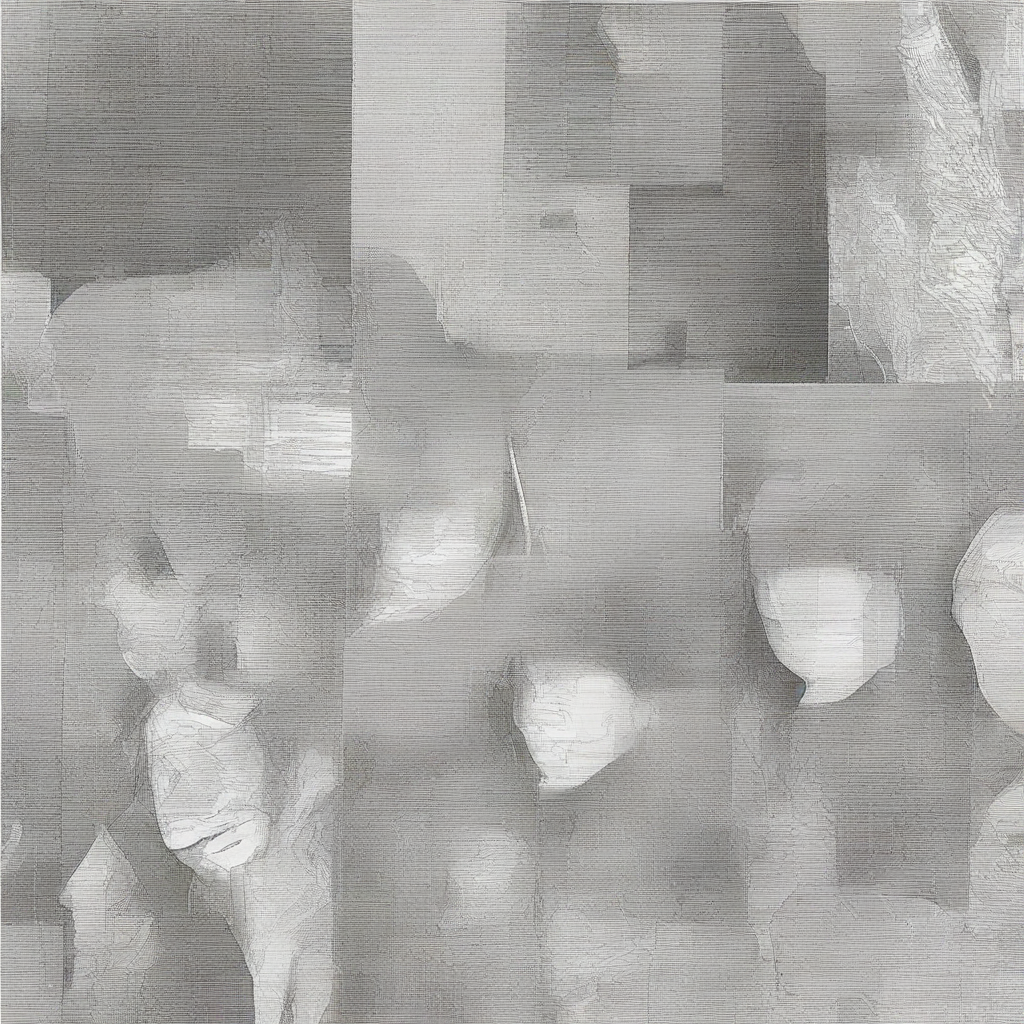

🔊 Ricevuto blob #5 da WebAudio
<class 'bytes'>
mi sono attivato
🎧 Predizione: Speech (0.690)
non genero
🔊 Ricevuto blob #6 da WebAudio
<class 'bytes'>
mi sono attivato
🎧 Predizione: Speech (0.474)
non genero
🔊 Ricevuto blob #7 da WebAudio
<class 'bytes'>
mi sono attivato
🤔 Nessuna classe rilevante con confidenza sufficiente.
🔊 Ricevuto blob #8 da WebAudio
<class 'bytes'>
mi sono attivato
🤔 Nessuna classe rilevante con confidenza sufficiente.
🔊 Ricevuto blob #9 da WebAudio
<class 'bytes'>
mi sono attivato
🤔 Nessuna classe rilevante con confidenza sufficiente.
🔊 Ricevuto blob #10 da WebAudio
<class 'bytes'>
mi sono attivato
🤔 Nessuna classe rilevante con confidenza sufficiente.
🔊 Ricevuto blob #11 da WebAudio
<class 'bytes'>
mi sono attivato
🎧 Predizione: Animal (0.688)
previous word: Animal
🔊 Ricevuto blob #12 da WebAudio
<class 'bytes'>
mi sono attivato
🤔 Nessuna classe rilevante con confidenza sufficiente.
🔊 Ricevuto blob #13 da WebAudio
<class 'bytes'>
mi sono attivato
🤔 Nessuna clas

In [73]:
audio_chunks = [] # Svuoto buffer
record_streaming_audio_js_ring()
print("\n\n") # se no Colab nasconde pulsanti

In [54]:
def play_last_chunk(rate=44100):
    """
    Riproduce l’ultimo blocco audio memorizzato in audio_chunks.
    rate: frequenza di campionamento (default 44100)
    """
    global audio_chunks
    if not audio_chunks:
        print("⚠️ Nessun blocco audio disponibile.")
        return

    chunk = audio_chunks[-1]
    display(Audio(data=chunk, rate=rate))
    print(f"🎧 Riproducendo ultimo blocco ({len(audio_chunks)} di {len(audio_chunks)})")


play_last_chunk()

🎧 Riproducendo ultimo blocco (9 di 9)
